# Breast Cancer Prediction

- The objective of this project is to create a predictive model that can accurately classify breast ccancer cases as benign or malignant based on a set of relevant features. By leveragin 
historical data and applying machine learning techniques, we aim to develop a reliable tool f r
assisting medical professionals in diagnosing breast cancer.

### Importing Dependencies:

In [1]:
import os, warnings
import math
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns  


from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import jaccard_score, confusion_matrix, roc_curve
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score


In [2]:
warnings.filterwarnings('ignore')
%matplotlib inline

## Loading Dataset & Data Preprocessing: 
- kaggle datasets: https://www.kaggle.com/datasets/nancyalaswad90/breast-cancer-dataset

In [3]:
data = pd.read_csv(os.path.join('Dataset', 'data.csv'))
data.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
data.drop(columns=['id'], inplace=True)
data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [7]:
# M -> Malignment (cancerous) :: 0 
# B -> Benign (non-cancerous) :: 1

data['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

### Encoding Labels:

In [8]:
labelencoder = LabelEncoder()
data['diagnosis'] = labelencoder.fit_transform(data['diagnosis'].values)
data['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

--- 

## Correlations:

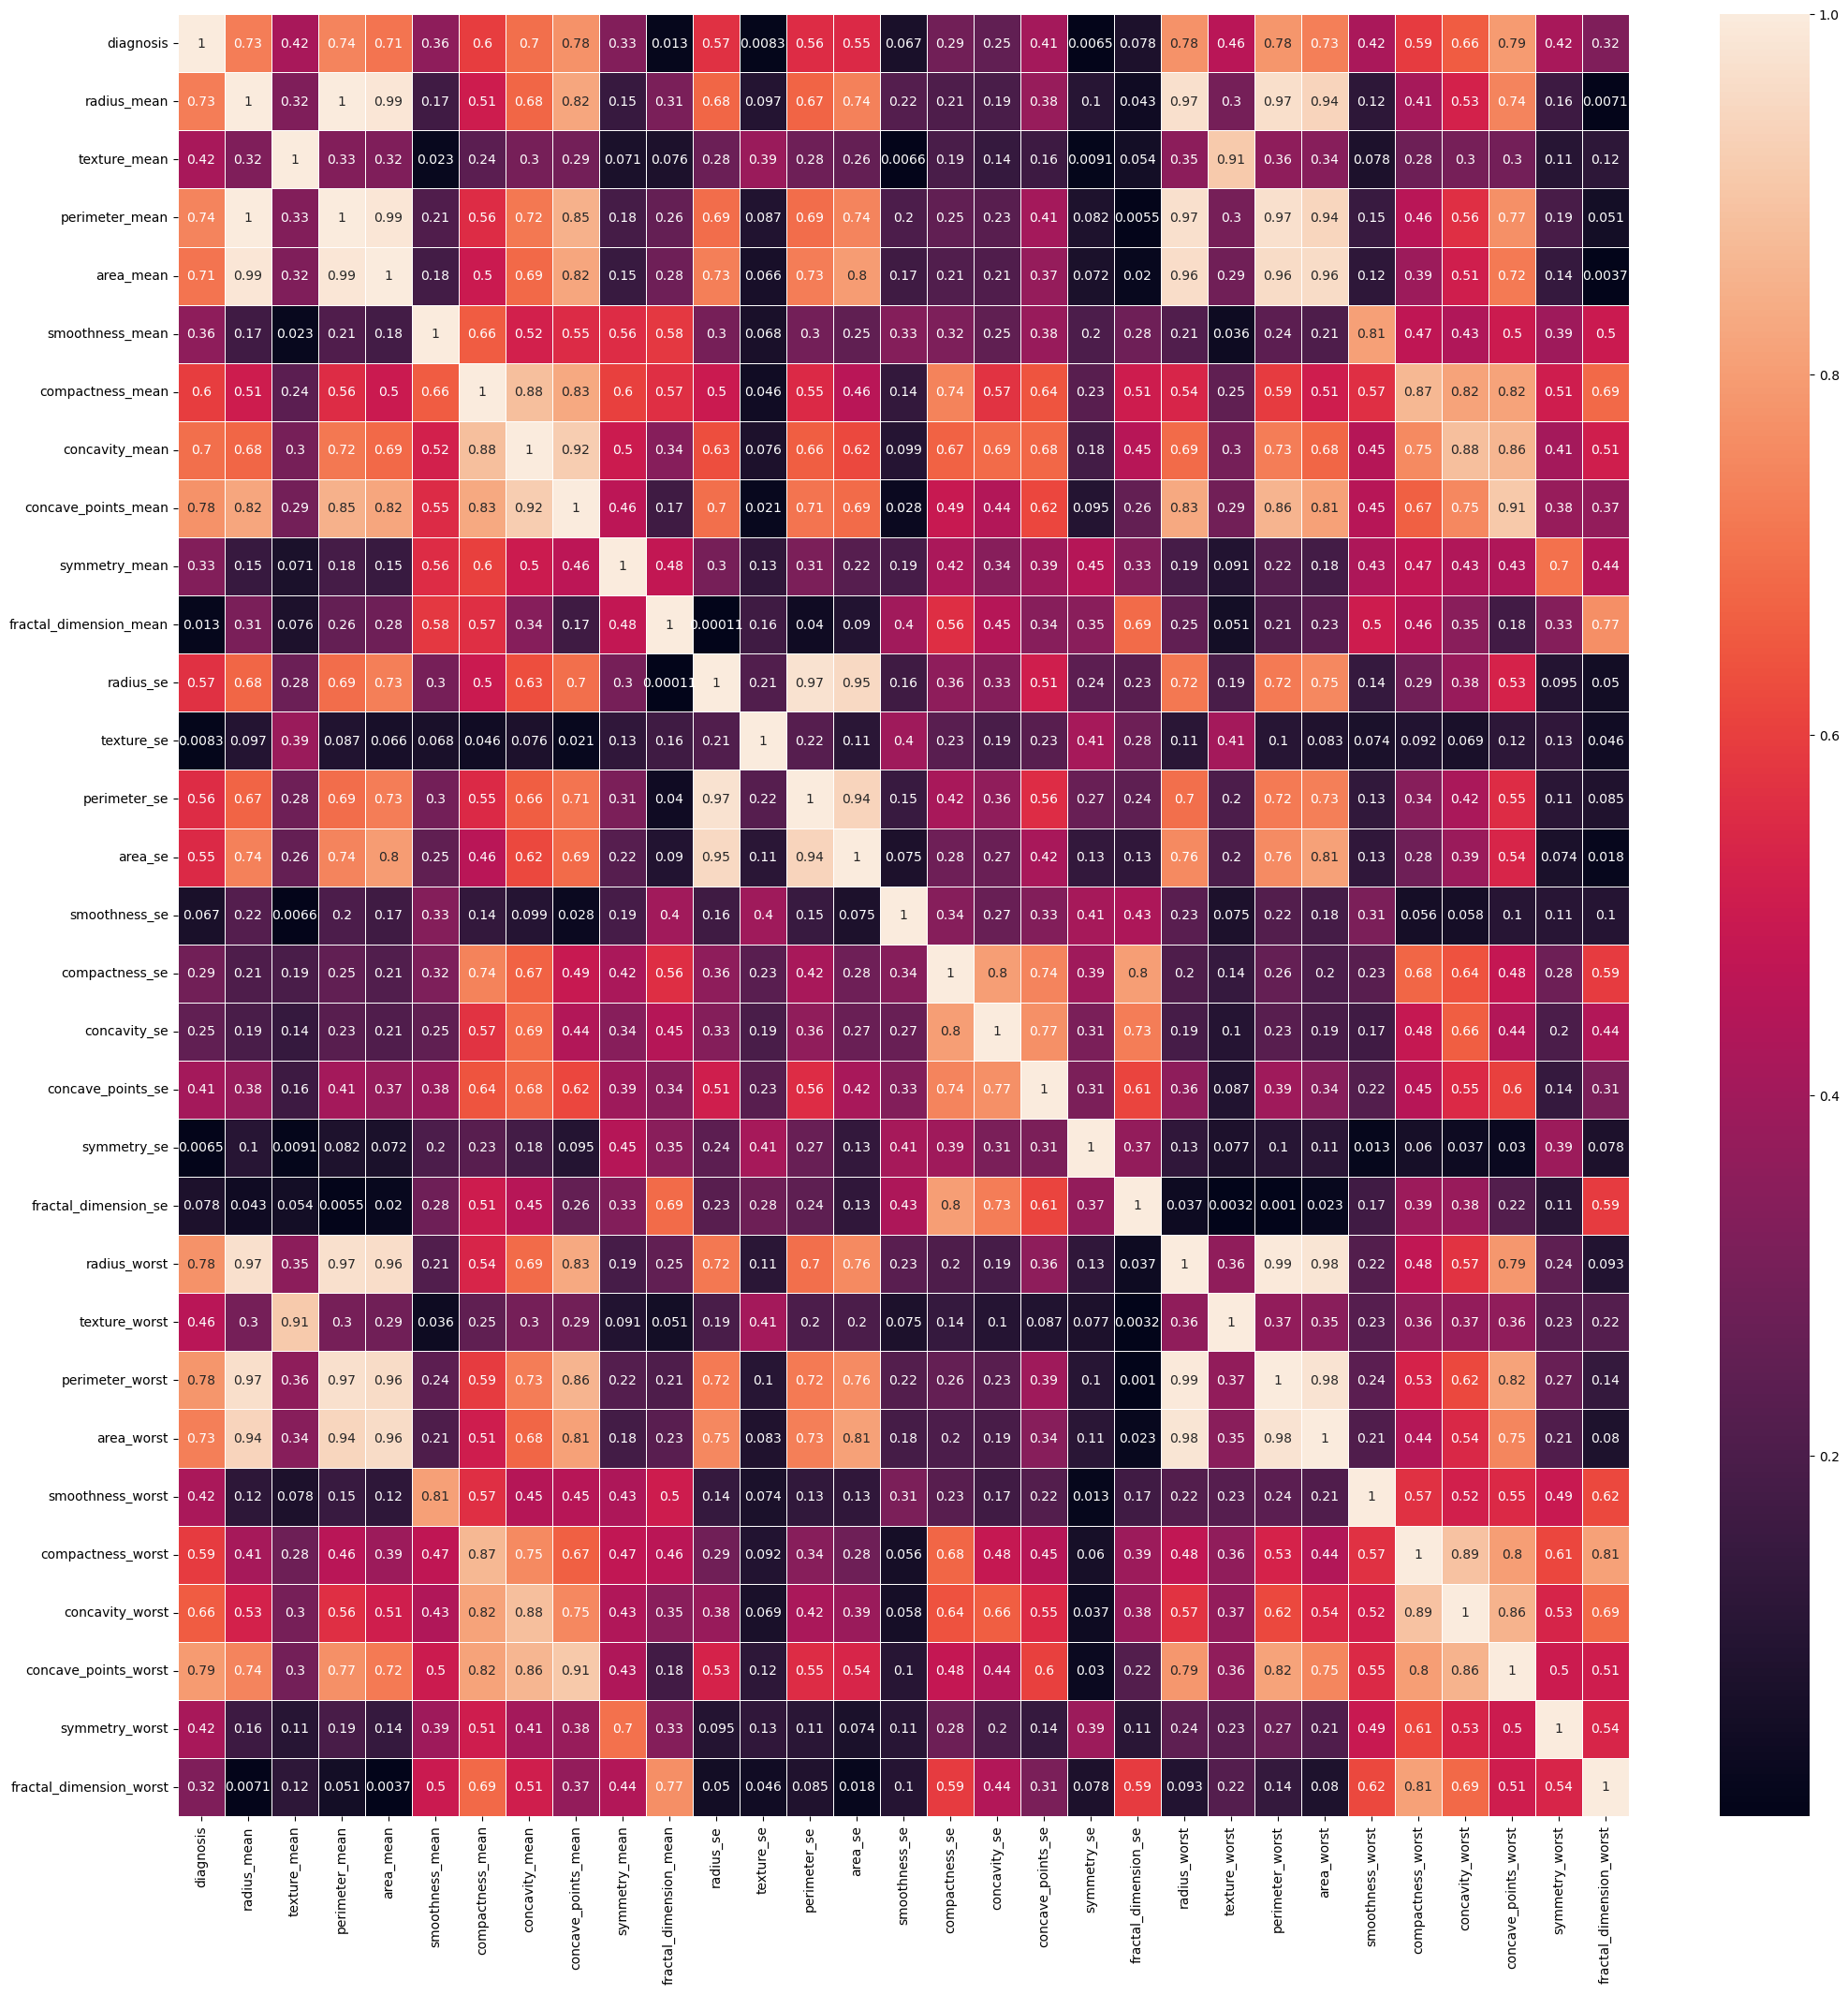

In [9]:
plt.figure(figsize=(25,25))
corr = data.corr().abs()
sns.heatmap(corr, annot=True, linewidth=0.5)
plt.show()

In [10]:
# Correlating whole data with the output (i.e.: diagnosis):

data.corrwith(data['diagnosis']).abs().sort_values(ascending=False)

diagnosis                  1.000000
concave_points_worst       0.793566
perimeter_worst            0.782914
concave_points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave_points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
smoothness_se              0

--- 

### Removing Less correlated attributes:

In [11]:
# Following attributes have correlation value less than 0.1 with the output and hence they don't contribute that much in producing the output:
junk_attr = ['symmetry_se', 'texture_se', 'fractal_dimension_mean', 'smoothness_se', 'fractal_dimension_se']
clean_data = data.drop(junk_attr, axis=1)
clean_data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


---

## Separating inputs and outputs: 

In [12]:
X = clean_data.drop('diagnosis', axis=1)
y = clean_data['diagnosis']

### Standardizing the data:

In [13]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

### Splitting Train and Test Data

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=20)

---

# Model Building 🔨, Training and Predictions:

---

## 1. KNN:

In [15]:
from sklearn.neighbors import KNeighborsClassifier

In [16]:
KNN = KNeighborsClassifier(n_neighbors=6)
KNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

- **Predictions** 

In [17]:
y_pred_knn = KNN.predict(X_test)

In [18]:
y_pred_knn

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0])

In [19]:
accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_knn_p = round(accuracy_knn*100, 2)
print(f"accuracy (KNN): {accuracy_knn_p}%\n")

accuracy (KNN): 96.5%



In [20]:
cm_knn = confusion_matrix(y_test, y_pred_knn)
cm_knn

array([[85,  1],
       [ 4, 53]], dtype=int64)

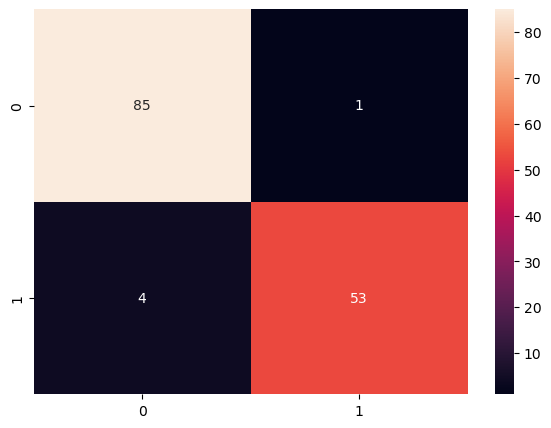

In [21]:
plt.figure(figsize=(7,5))
sns.heatmap(cm_knn, annot=True)
plt.show()

---

## 2. ANN (Artificial Neural Networks): 

- **Standardizing for ANN (Min-Max [0-1] Scaling)**

In [22]:
mm_scaler = MinMaxScaler()
X_ann = mm_scaler.fit_transform(clean_data.drop('diagnosis', axis=1))

In [23]:
X_ann

array([[0.52103744, 0.0226581 , 0.54598853, ..., 0.91202749, 0.59846245,
        0.41886396],
       [0.64314449, 0.27257355, 0.61578329, ..., 0.63917526, 0.23358959,
        0.22287813],
       [0.60149557, 0.3902604 , 0.59574321, ..., 0.83505155, 0.40370589,
        0.21343303],
       ...,
       [0.45525108, 0.62123774, 0.44578813, ..., 0.48728522, 0.12872068,
        0.1519087 ],
       [0.64456434, 0.66351031, 0.66553797, ..., 0.91065292, 0.49714173,
        0.45231536],
       [0.03686876, 0.50152181, 0.02853984, ..., 0.        , 0.25744136,
        0.10068215]])

- **Train & Test Splitting of newly transformed attributes:**

In [24]:
X_train_ann, X_test_ann, y_train_ann, y_test_ann = train_test_split(X_ann, y, test_size=0.25, random_state=20)

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [26]:
ann_model = Sequential()

ann_model.add(Dense(26, activation='relu', input_dim=25))
ann_model.add(Dense(13, activation='relu'))
ann_model.add(Dense(6, activation='relu'))
ann_model.add(Dense(1, activation='sigmoid'))

ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [27]:
ann_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 26)                676       
                                                                 
 dense_1 (Dense)             (None, 13)                351       
                                                                 
 dense_2 (Dense)             (None, 6)                 84        
                                                                 
 dense_3 (Dense)             (None, 1)                 7         
                                                                 
Total params: 1,118
Trainable params: 1,118
Non-trainable params: 0
_________________________________________________________________


In [28]:
hist_ann = ann_model.fit(X_train_ann, y_train_ann, 
                         epochs=150, 
                         validation_split=0.2)

Epoch 1/150
11/11 [==============================] - 5s 104ms/step - loss: 0.6678 - accuracy: 0.7647 - val_loss: 0.6559 - val_accuracy: 0.7791
Epoch 2/150
11/11 [==============================] - 0s 12ms/step - loss: 0.6414 - accuracy: 0.8294 - val_loss: 0.6240 - val_accuracy: 0.8605
Epoch 3/150
11/11 [==============================] - 0s 10ms/step - loss: 0.6091 - accuracy: 0.8647 - val_loss: 0.5888 - val_accuracy: 0.8605
Epoch 4/150
11/11 [==============================] - 0s 10ms/step - loss: 0.5720 - accuracy: 0.8618 - val_loss: 0.5496 - val_accuracy: 0.8605
Epoch 5/150
11/11 [==============================] - 0s 9ms/step - loss: 0.5320 - accuracy: 0.8706 - val_loss: 0.5135 - val_accuracy: 0.8605
Epoch 6/150
11/11 [==============================] - 0s 8ms/step - loss: 0.4917 - accuracy: 0.8794 - val_loss: 0.4664 - val_accuracy: 0.8837
Epoch 7/150
11/11 [==============================] - 0s 8ms/step - loss: 0.4573 - accuracy: 0.8794 - val_loss: 0.4351 - val_accuracy: 0.8721
Epoch 8/

In [29]:
tr_ann_accuracy = hist_ann.history['accuracy']
tr_ann_loss = hist_ann.history['loss']

epochs = [i+1 for i in range(len(tr_ann_accuracy))]

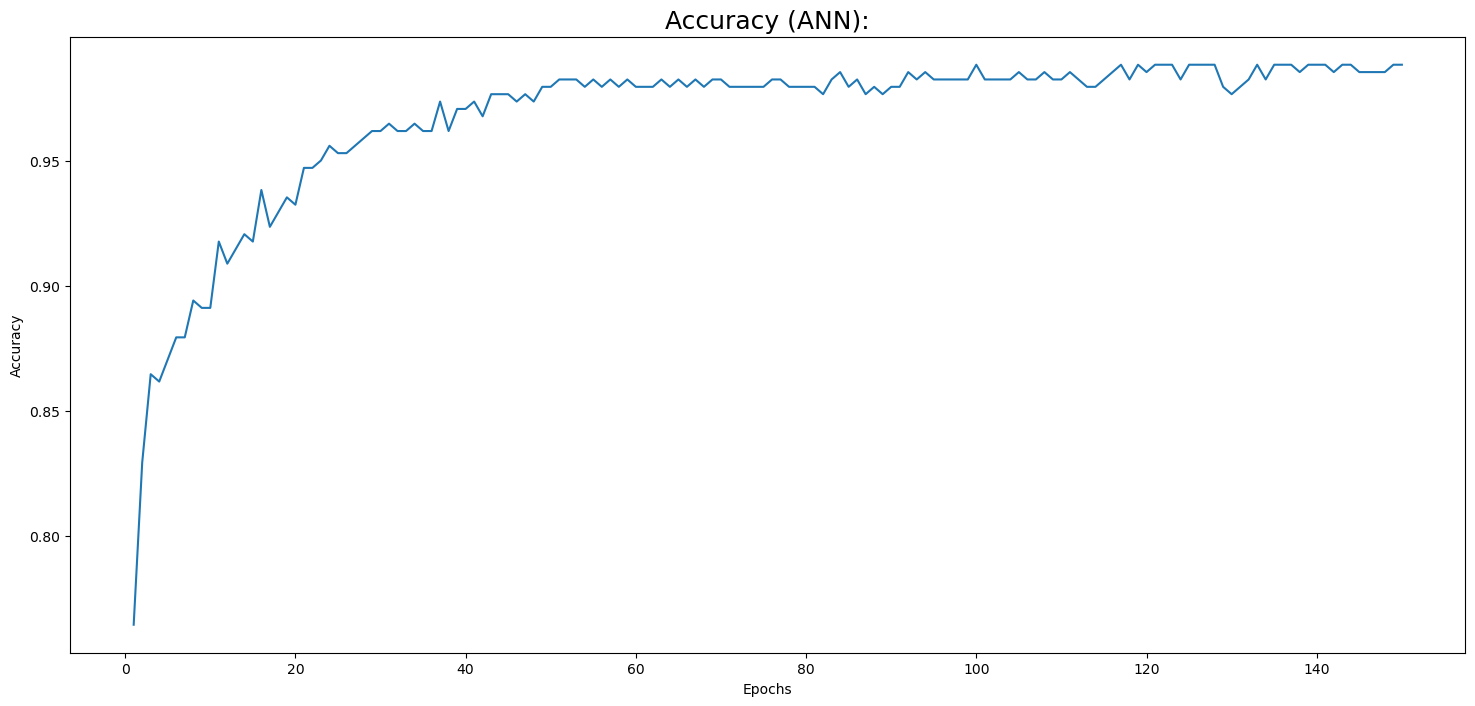

In [30]:
plt.figure(figsize=(18, 8))
plt.plot(epochs, tr_ann_accuracy)
plt.title('Accuracy (ANN):', fontsize=18)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

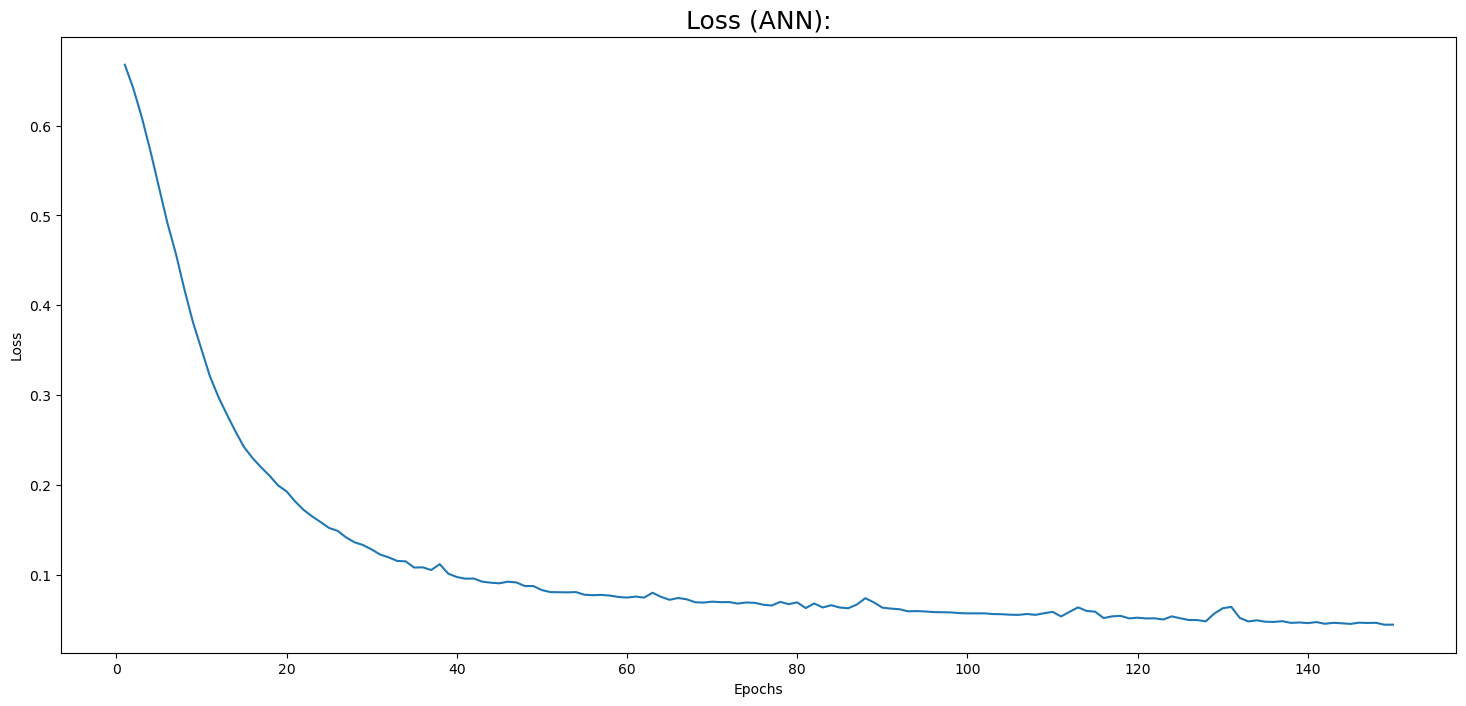

In [31]:
plt.figure(figsize=(18, 8))
plt.plot(epochs, tr_ann_loss)
plt.title('Loss (ANN):', fontsize=18)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

- **Predictions:**

In [32]:
y_pred_ann = ann_model.predict(X_test_ann)
y_pred_ann = (y_pred_ann > 0.5)
# y_pred_ann

5/5 [==============================] - 0s 5ms/step


In [33]:
accuracy_ann = accuracy_score(y_test_ann, y_pred_ann)
accuracy_ann_p = round(accuracy_ann*100, 2)
print(f"accuracy (KNN): {accuracy_ann_p}%\n")

accuracy (KNN): 98.6%



In [34]:
cm_ann = confusion_matrix(y_test_ann, y_pred_ann)
cm_ann

array([[85,  1],
       [ 1, 56]], dtype=int64)

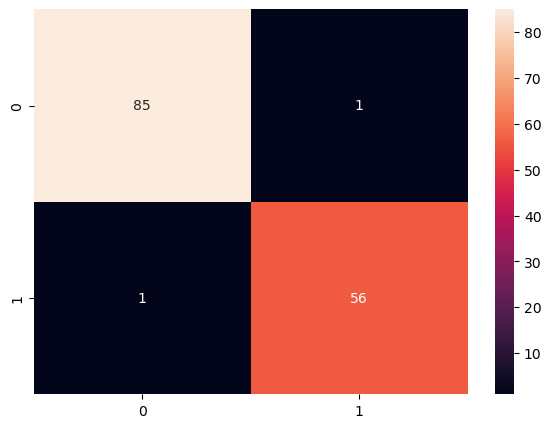

In [35]:
plt.figure(figsize=(7,5))
sns.heatmap(cm_ann, annot=True)
plt.show()

In [36]:
ann_model.save("best_model.h5")

---

# Conclusions:

In [37]:
evaluation = {
    'Model' : ['K-nearest neighbors', 'Artificial Neural Network'],
    'Accuracy (%)' : [accuracy_knn_p, accuracy_ann_p]
}
eval = pd.DataFrame.from_dict(evaluation)
eval

,Model,Accuracy (%)
0,K-nearest neighbors,96.5
1,Artificial Neural Network,98.6


---